In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

sys.path.insert(0, str(Path.cwd().parent.parent))

from src import AblationStudy, DatasetLoader, set_global_seed

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 11

/workspaces/gnn-sparsification-research/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
set_global_seed(42)

if torch.cuda.is_available():
    DEVICE = "cuda"
elif torch.backends.mps.is_available():
    DEVICE = "mps"
else:
    DEVICE = "cpu"

print(f"Using device: {DEVICE}")

Using device: cpu


## 1. Run Comprehensive Experiments

In [3]:
loader = DatasetLoader(root="../data")
data, num_features, num_classes = loader.get_dataset("cora", DEVICE)

print(f"Dataset: Cora")
print(f"Nodes: {data.num_nodes:,}, Edges: {data.edge_index.shape[1]:,}")

Dataset: Cora
Nodes: 2,708, Edges: 10,556


In [4]:
study = AblationStudy(
    data=data,
    num_features=num_features,
    num_classes=num_classes,
    device=DEVICE,
)

all_results_df = study.run_multi_config_study(
    model_names=["gcn"],
    metrics=["jaccard", "adamic_adar"],
    retention_ratios=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3],
    hidden_channels=64,
    epochs=200,
    patience=20,
)


Config: gcn | jaccard | 90%
Running A: Full + Binary...
  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.7870
Running C: Full + Weighted...
  -> Accuracy: 0.7230
Running D: Sparse + Weighted...
  -> Accuracy: 0.7470

Config: gcn | jaccard | 80%
Running A: Full + Binary...
  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.7830
Running C: Full + Weighted...
  -> Accuracy: 0.7230
Running D: Sparse + Weighted...
  -> Accuracy: 0.7450

Config: gcn | jaccard | 70%
Running A: Full + Binary...
  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.7740
Running C: Full + Weighted...
  -> Accuracy: 0.7230
Running D: Sparse + Weighted...
  -> Accuracy: 0.7290

Config: gcn | jaccard | 60%
Running A: Full + Binary...
  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.7120
Running C: Full + Weighted...
  -> Accuracy: 0.7230
Running D: Sparse + Weighted...
  -> Accuracy: 0.6900

Config: gcn | jaccard | 50%
Running A: Full + Binar

/workspaces/gnn-sparsification-research/src/sparsification/metrics.py:85: RuntimeWarning: divide by zero encountered in log
  log_degrees = np.log(degrees)


  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.7820
Running C: Full + Weighted...
  -> Accuracy: 0.7260
Running D: Sparse + Weighted...
  -> Accuracy: 0.7290

Config: gcn | adamic_adar | 80%
Running A: Full + Binary...


/workspaces/gnn-sparsification-research/src/sparsification/metrics.py:85: RuntimeWarning: divide by zero encountered in log
  log_degrees = np.log(degrees)


  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.7810
Running C: Full + Weighted...
  -> Accuracy: 0.7260
Running D: Sparse + Weighted...
  -> Accuracy: 0.7150

Config: gcn | adamic_adar | 70%
Running A: Full + Binary...


/workspaces/gnn-sparsification-research/src/sparsification/metrics.py:85: RuntimeWarning: divide by zero encountered in log
  log_degrees = np.log(degrees)


  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.7580
Running C: Full + Weighted...
  -> Accuracy: 0.7260
Running D: Sparse + Weighted...
  -> Accuracy: 0.7080

Config: gcn | adamic_adar | 60%
Running A: Full + Binary...


/workspaces/gnn-sparsification-research/src/sparsification/metrics.py:85: RuntimeWarning: divide by zero encountered in log
  log_degrees = np.log(degrees)


  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.6990
Running C: Full + Weighted...
  -> Accuracy: 0.7260
Running D: Sparse + Weighted...
  -> Accuracy: 0.6660

Config: gcn | adamic_adar | 50%
Running A: Full + Binary...


/workspaces/gnn-sparsification-research/src/sparsification/metrics.py:85: RuntimeWarning: divide by zero encountered in log
  log_degrees = np.log(degrees)


  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.6750
Running C: Full + Weighted...
  -> Accuracy: 0.7260
Running D: Sparse + Weighted...
  -> Accuracy: 0.6450

Config: gcn | adamic_adar | 40%
Running A: Full + Binary...


/workspaces/gnn-sparsification-research/src/sparsification/metrics.py:85: RuntimeWarning: divide by zero encountered in log
  log_degrees = np.log(degrees)


  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.6720
Running C: Full + Weighted...
  -> Accuracy: 0.7260
Running D: Sparse + Weighted...
  -> Accuracy: 0.6390

Config: gcn | adamic_adar | 30%
Running A: Full + Binary...


/workspaces/gnn-sparsification-research/src/sparsification/metrics.py:85: RuntimeWarning: divide by zero encountered in log
  log_degrees = np.log(degrees)


  -> Accuracy: 0.7890
Running B: Sparse + Binary...
  -> Accuracy: 0.6570
Running C: Full + Weighted...
  -> Accuracy: 0.7260
Running D: Sparse + Weighted...
  -> Accuracy: 0.6250


## 2. Results DataFrame

In [5]:
df = all_results_df.copy()
df["Metric"] = df["Metric"].str.replace("_", " ").str.title()
df.head(12)

,Scenario,Accuracy,Epochs,BestValAcc,Edges,Model,Metric,Retention
0,A: Full + Binary,0.789,29,0.788,10556,gcn,Jaccard,0.9
1,B: Sparse + Binary,0.787,27,0.770,9500,gcn,Jaccard,0.9
2,C: Full + Weighted,0.723,28,0.758,10556,gcn,Jaccard,0.9
3,D: Sparse + Weighted,0.747,31,0.758,9500,gcn,Jaccard,0.9
4,A: Full + Binary,0.789,29,0.788,10556,gcn,Jaccard,0.8
5,B: Sparse + Binary,0.783,33,0.770,8444,gcn,Jaccard,0.8
6,C: Full + Weighted,0.723,28,0.758,10556,gcn,Jaccard,0.8
7,D: Sparse + Weighted,0.745,33,0.766,8444,gcn,Jaccard,0.8
8,A: Full + Binary,0.789,29,0.788,10556,gcn,Jaccard,0.7
9,B: Sparse + Binary,0.774,30,0.756,7389,gcn,Jaccard,0.7


## 3. Heatmap: Test Accuracy by Retention and Scenario

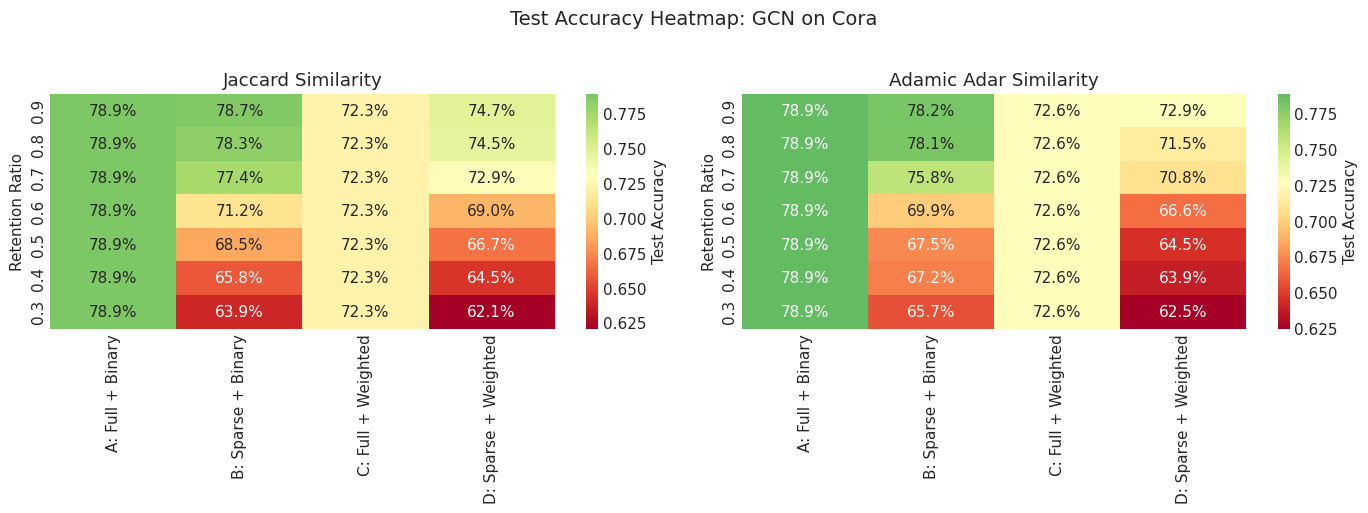

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, metric in enumerate(["Jaccard", "Adamic Adar"]):
    metric_df = df[df["Metric"] == metric]
    pivot = metric_df.pivot(index="Retention", columns="Scenario", values="Accuracy")
    pivot = pivot.sort_index(ascending=False)

    sns.heatmap(
        pivot,
        annot=True,
        fmt=".1%",
        cmap="RdYlGn",
        center=pivot.values.mean(),
        ax=axes[idx],
        cbar_kws={"label": "Test Accuracy"},
    )
    axes[idx].set_title(f"{metric} Similarity")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Retention Ratio")

plt.suptitle("Test Accuracy Heatmap: GCN on Cora", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 4. Effect Decomposition

In [7]:
def compute_effects(df_subset):
    """Compute main effects and interaction from ablation results."""
    a = df_subset[df_subset["Scenario"] == "A: Full + Binary"]["Accuracy"].values[0]
    b = df_subset[df_subset["Scenario"] == "B: Sparse + Binary"]["Accuracy"].values[0]
    c = df_subset[df_subset["Scenario"] == "C: Full + Weighted"]["Accuracy"].values[0]
    d = df_subset[df_subset["Scenario"] == "D: Sparse + Weighted"]["Accuracy"].values[0]

    return {
        "Baseline (A)": a,
        "Structure Effect (B-A)": b - a,
        "Weighting Effect (C-A)": c - a,
        "Combined Effect (D-A)": d - a,
        "Interaction (D-B-C+A)": d - b - c + a,
    }


effect_rows = []
for metric in df["Metric"].unique():
    for retention in df["Retention"].unique():
        subset = df[(df["Metric"] == metric) & (df["Retention"] == retention)]
        effects = compute_effects(subset)
        for effect_name, value in effects.items():
            effect_rows.append({
                "Metric": metric,
                "Retention": retention,
                "Effect": effect_name,
                "Value": value,
            })

effect_df = pd.DataFrame(effect_rows)
effect_df.head(10)

,Metric,Retention,Effect,Value
0,Jaccard,0.9,Baseline (A),0.789
1,Jaccard,0.9,Structure Effect (B-A),-0.002
2,Jaccard,0.9,Weighting Effect (C-A),-0.066
3,Jaccard,0.9,Combined Effect (D-A),-0.042
4,Jaccard,0.9,Interaction (D-B-C+A),0.026
5,Jaccard,0.8,Baseline (A),0.789
6,Jaccard,0.8,Structure Effect (B-A),-0.006
7,Jaccard,0.8,Weighting Effect (C-A),-0.066
8,Jaccard,0.8,Combined Effect (D-A),-0.044
9,Jaccard,0.8,Interaction (D-B-C+A),0.028


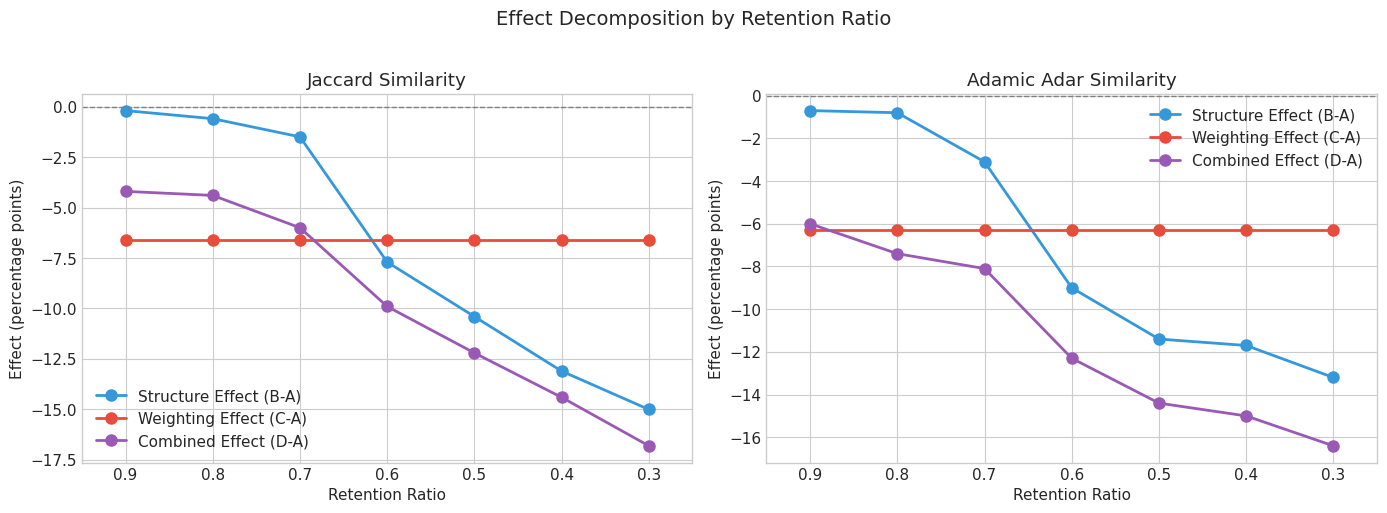

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

effects_to_plot = ["Structure Effect (B-A)", "Weighting Effect (C-A)", "Combined Effect (D-A)"]
colors = ["#3498db", "#e74c3c", "#9b59b6"]

for idx, metric in enumerate(["Jaccard", "Adamic Adar"]):
    metric_effect_df = effect_df[(effect_df["Metric"] == metric) & (effect_df["Effect"].isin(effects_to_plot))]

    for i, effect in enumerate(effects_to_plot):
        effect_data = metric_effect_df[metric_effect_df["Effect"] == effect]
        axes[idx].plot(
            effect_data["Retention"],
            effect_data["Value"] * 100,
            marker="o",
            linewidth=2,
            markersize=8,
            color=colors[i],
            label=effect,
        )

    axes[idx].axhline(0, color="gray", linestyle="--", linewidth=1)
    axes[idx].set_xlabel("Retention Ratio")
    axes[idx].set_ylabel("Effect (percentage points)")
    axes[idx].set_title(f"{metric} Similarity")
    axes[idx].legend()
    axes[idx].set_xlim(0.25, 0.95)
    axes[idx].invert_xaxis()

plt.suptitle("Effect Decomposition by Retention Ratio", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 5. Scenario Comparison Line Plot

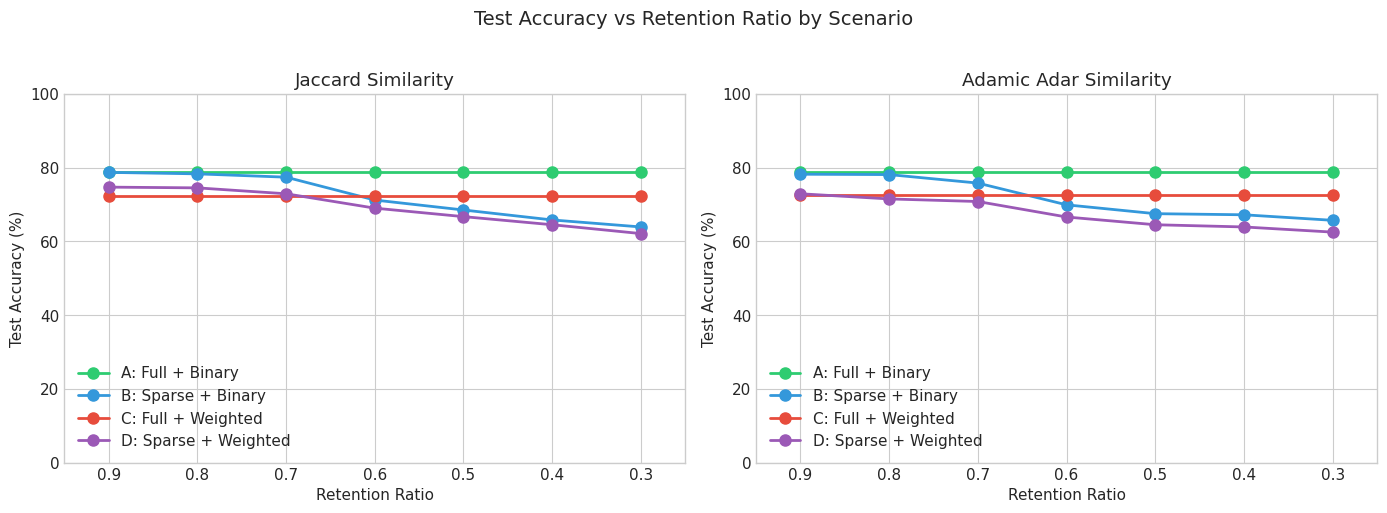

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

scenario_colors = {
    "A: Full + Binary": "#2ecc71",
    "B: Sparse + Binary": "#3498db",
    "C: Full + Weighted": "#e74c3c",
    "D: Sparse + Weighted": "#9b59b6",
}

for idx, metric in enumerate(["Jaccard", "Adamic Adar"]):
    metric_df = df[df["Metric"] == metric]

    for scenario, color in scenario_colors.items():
        scenario_data = metric_df[metric_df["Scenario"] == scenario]
        axes[idx].plot(
            scenario_data["Retention"],
            scenario_data["Accuracy"] * 100,
            marker="o",
            linewidth=2,
            markersize=8,
            color=color,
            label=scenario,
        )

    axes[idx].set_xlabel("Retention Ratio")
    axes[idx].set_ylabel("Test Accuracy (%)")
    axes[idx].set_title(f"{metric} Similarity")
    axes[idx].legend(loc="lower left")
    axes[idx].set_xlim(0.25, 0.95)
    axes[idx].invert_xaxis()
    axes[idx].set_ylim(0, 100)

plt.suptitle("Test Accuracy vs Retention Ratio by Scenario", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 6. Summary Statistics Table

In [10]:
summary = df.groupby(["Metric", "Scenario"]).agg({
    "Accuracy": ["mean", "std", "min", "max"],
    "Epochs": "mean",
}).round(4)

summary.columns = ["Mean Acc", "Std Acc", "Min Acc", "Max Acc", "Avg Epochs"]
summary

Mean Acc  Std Acc  Min Acc  Max Acc  \
Metric      Scenario                                                    
Adamic Adar A: Full + Binary        0.7890   0.0000    0.789    0.789   
            B: Sparse + Binary      0.7177   0.0543    0.657    0.782   
            C: Full + Weighted      0.7260   0.0000    0.726    0.726   
            D: Sparse + Weighted    0.6753   0.0416    0.625    0.729   
Jaccard     A: Full + Binary        0.7890   0.0000    0.789    0.789   
            B: Sparse + Binary      0.7197   0.0620    0.639    0.787   
            C: Full + Weighted      0.7230   0.0000    0.723    0.723   
            D: Sparse + Weighted    0.6920   0.0501    0.621    0.747   

                                  Avg Epochs  
Metric      Scenario                          
Adamic Adar A: Full + Binary         29.0000  
            B: Sparse + Binary       31.2857  
            C: Full + Weighted       29.0000  
            D: Sparse + Weighted     29.8571  
Jaccard     A: Full + Binary         29.0000  
            B: Sparse + Binary       30.7143  
            C: Full + Weighted       28.0000  
            D: Sparse + Weighted     30.8571

## 7. Best Configuration per Scenario

In [11]:
best_configs = df.loc[df.groupby(["Metric", "Scenario"])["Accuracy"].idxmax()]
best_configs[["Metric", "Scenario", "Retention", "Accuracy", "Epochs"]]

,Metric,Scenario,Retention,Accuracy,Epochs
28,Adamic Adar,A: Full + Binary,0.9,0.789,29
29,Adamic Adar,B: Sparse + Binary,0.9,0.782,27
30,Adamic Adar,C: Full + Weighted,0.9,0.726,29
31,Adamic Adar,D: Sparse + Weighted,0.9,0.729,29
0,Jaccard,A: Full + Binary,0.9,0.789,29
1,Jaccard,B: Sparse + Binary,0.9,0.787,27
2,Jaccard,C: Full + Weighted,0.9,0.723,28
3,Jaccard,D: Sparse + Weighted,0.9,0.747,31


## 8. Training Dynamics: Validation Accuracy Over Epochs

In [12]:
# Run training curves for a single configuration to visualize training dynamics
training_curves = study.run_training_curves(
    model_name="gcn",
    metric="jaccard",
    retention_ratio=0.6,
    hidden_channels=64,
    epochs=100,
    patience=None,  # Train for full 100 epochs to see complete curves
    seed=42,
)

# Display the number of epochs for each scenario
for scenario, val_acc_history in training_curves.items():
    print(f"{scenario}: {len(val_acc_history)} epochs")

Training A: Full + Binary...
  -> Final val acc: 0.7740 (epochs: 100)
Training B: Sparse + Binary...
  -> Final val acc: 0.7120 (epochs: 100)
Training C: Full + Weighted...
  -> Final val acc: 0.7380 (epochs: 100)
Training D: Sparse + Weighted...
  -> Final val acc: 0.6980 (epochs: 100)
A: Full + Binary: 100 epochs
B: Sparse + Binary: 100 epochs
C: Full + Weighted: 100 epochs
D: Sparse + Weighted: 100 epochs


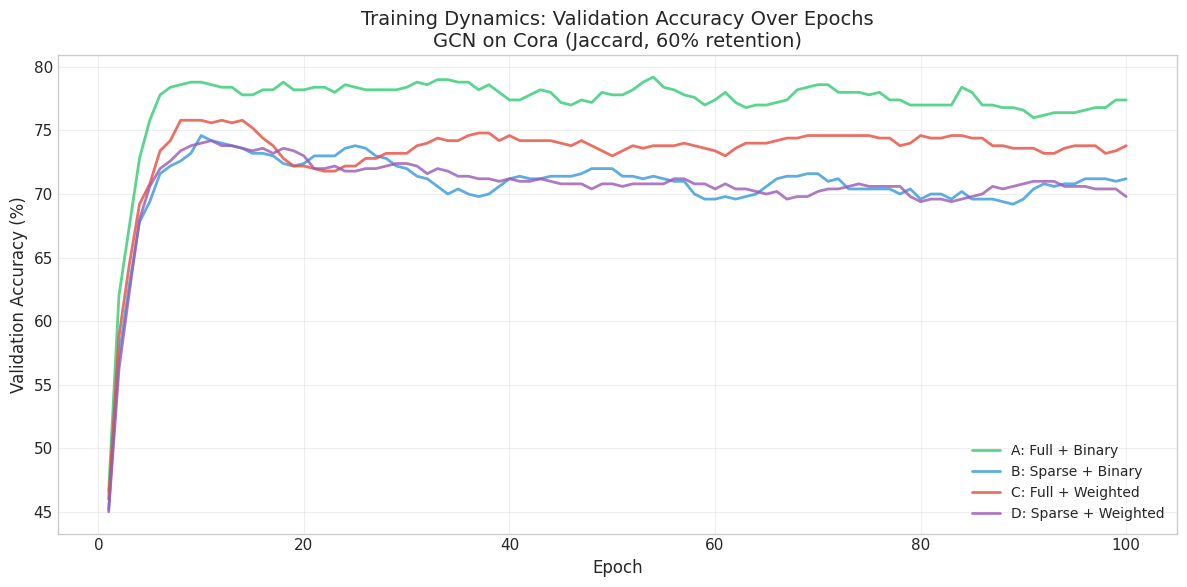

In [13]:
# Plot training curves for all 4 scenarios
plt.figure(figsize=(12, 6))

scenario_colors = {
    "A: Full + Binary": "#2ecc71",
    "B: Sparse + Binary": "#3498db",
    "C: Full + Weighted": "#e74c3c",
    "D: Sparse + Weighted": "#9b59b6",
}

for scenario, val_acc_history in training_curves.items():
    epochs = range(1, len(val_acc_history) + 1)
    plt.plot(
        epochs,
        np.array(val_acc_history) * 100,
        color=scenario_colors[scenario],
        linewidth=2,
        label=scenario,
        alpha=0.8,
    )

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy (%)", fontsize=12)
plt.title("Training Dynamics: Validation Accuracy Over Epochs\nGCN on Cora (Jaccard, 60% retention)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
# Comparative analysis: convergence speed and final performance
convergence_stats = []

for scenario, val_acc_history in training_curves.items():
    val_acc_array = np.array(val_acc_history)
    
    # Find epoch when accuracy reaches 95% of maximum
    max_acc = val_acc_array.max()
    threshold = 0.95 * max_acc
    convergence_epoch = np.argmax(val_acc_array >= threshold) + 1
    
    convergence_stats.append({
        "Scenario": scenario,
        "Final Val Acc": val_acc_array[-1],
        "Best Val Acc": max_acc,
        "Convergence Epoch (95%)": convergence_epoch,
        "Improvement (first 10 epochs)": val_acc_array[9] - val_acc_array[0],
    })

convergence_df = pd.DataFrame(convergence_stats)
convergence_df = convergence_df.round(4)
convergence_df

,Scenario,Final Val Acc,Best Val Acc,Convergence Epoch (95%),Improvement (first 10 epochs)
0,A: Full + Binary,0.774,0.792,5,0.322
1,B: Sparse + Binary,0.712,0.746,6,0.294
2,C: Full + Weighted,0.738,0.758,6,0.298
3,D: Sparse + Weighted,0.698,0.742,5,0.290


## 9. Export Results

In [15]:
output_dir = Path("../results")
output_dir.mkdir(exist_ok=True)

df.to_csv(output_dir / "ablation_results.csv", index=False)
effect_df.to_csv(output_dir / "effect_decomposition.csv", index=False)
summary.to_csv(output_dir / "summary_statistics.csv")

print(f"Results exported to {output_dir.resolve()}")

Results exported to /workspaces/gnn-sparsification-research/notebooks/results


## 10. Summary

This notebook provided:
- Comprehensive ablation study across multiple retention ratios and metrics
- Heatmap visualization for quick comparison
- Effect decomposition analysis (structure, weighting, interaction)
- Line plots showing trends across retention ratios
- Training dynamics comparison across all four scenarios
- Convergence speed analysis
- Summary statistics and exportable CSV files

**Key Findings:**
1. The effect of sparsification varies with retention ratio
2. Weighting and sparsification may have synergistic or antagonistic interactions
3. Optimal retention ratio depends on the similarity metric used
4. Training dynamics reveal differences in convergence speed across scenarios

**For publication:**
- Use the heatmaps for overview figures
- Use effect decomposition plots for detailed analysis
- Use training curves to illustrate convergence behavior
- Export CSV files for statistical testing in R or other tools